In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

Example of solutions: [Mission155Solutions](https://github.com/dataquestio/solutions/blob/master/Mission155Solutions.ipynb)

In [2]:
cols = ['symboling: -3, -2, -1, 0, 1, 2, 3.',
        'normalized-losses: continuous from 65 to 256.',
        'make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo ',
        'fuel-type: diesel, gas. ',
        'aspiration: std, turbo. ',
        'num-of-doors: four, two. ',
        'body-style: hardtop, wagon, sedan, hatchback, convertible. ',
        'drive-wheels: 4wd, fwd, rwd.', 
        'engine-location: front, rear. ',
        'wheel-base: continuous from 86.6 120.9. ',
        'length: continuous from 141.1 to 208.1. ',
        'width: continuous from 60.3 to 72.3. ',
        'height: continuous from 47.8 to 59.8. ',
        'curb-weight: continuous from 1488 to 4066. ',
        'engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.', 
        'num-of-cylinders: eight, five, four, six, three, twelve, two. ',
        'engine-size: continuous from 61 to 326. ',
        'fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. ',
        'bore: continuous from 2.54 to 3.94. ',
        'stroke: continuous from 2.07 to 4.17. ',
        'compression-ratio: continuous from 7 to 23.', 
        'horsepower: continuous from 48 to 288. ',
        'peak-rpm: continuous from 4150 to 6600. ',
        'city-mpg: continuous from 13 to 49. ',
        'highway-mpg: continuous from 16 to 54.', 
        'price: continuous from 5118 to 45400.'
       ]

In [3]:
cols = [i.split(':')[0] for i in cols]

In [4]:
cars = pd.read_csv('imports-85.data',names = cols)

In [5]:
cars.shape

(205, 26)

In [6]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
cars.replace({'?' : np.nan}, inplace=True)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [9]:
cars.drop('normalized-losses', axis = 1, inplace= True)

In [10]:
to_numeric = ['bore', 'stroke', 'horsepower', 'peak-rpm','price']

In [11]:
cars[to_numeric] = cars[to_numeric].astype('float')

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [13]:
cars.shape

(205, 25)

### Fill NaN values by means

In [14]:
cars_mean = cars.fillna(cars.mean())

In [15]:
number_columns = list(cars_mean.select_dtypes(include=[np.number]).columns)

In [16]:
cars_mean[number_columns] = (cars_mean[number_columns]-cars_mean[number_columns].mean())/cars_mean[number_columns].std()

In [17]:
cars_mean.head(3)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.739213,alfa-romero,gas,std,two,convertible,rwd,front,-1.686643,-0.425480,...,0.074267,mpfi,0.517822,-1.834912,-0.287645,0.170647,-0.262841,-0.644974,-0.544725,0.036584
1,1.739213,alfa-romero,gas,std,two,convertible,rwd,front,-1.686643,-0.425480,...,0.074267,mpfi,0.517822,-1.834912,-0.287645,0.170647,-0.262841,-0.644974,-0.544725,0.418473
2,0.133183,alfa-romero,gas,std,two,hatchback,rwd,front,-0.706865,-0.230948,...,0.602571,mpfi,-2.398990,0.684245,-0.287645,1.258726,-0.262841,-0.950684,-0.689938,0.418473


In [18]:
def knn_train_test(columns, target, df, k = 5):
    knn = KNeighborsRegressor(n_neighbors= k)
    
    split_num = np.floor(len(df) * 0.66).astype('int')
    train = df[:split_num]
    test = df[split_num:]
    
    fit = knn.fit(train[columns], train[target])
    prediction = fit.predict(test[columns])
    rmse = np.sqrt(mean_squared_error(test[target], prediction))
    
    return rmse

In [19]:
number_columns.remove('price')
number_columns

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [20]:
rmses = {}
for column in number_columns:
    rmses[column] = knn_train_test(columns=[column],
                                   target='price',
                                   df = cars_mean,
                                   k = 5)

rmses

{'bore': 1.9079112665962625,
 'city-mpg': 0.45192766956037894,
 'compression-ratio': 1.0192857194650742,
 'curb-weight': 0.32626715699213626,
 'engine-size': 0.46948181914971571,
 'height': 1.0151957757959,
 'highway-mpg': 0.39696724966865876,
 'horsepower': 0.52140852825366912,
 'length': 0.74433155338012591,
 'peak-rpm': 1.238086904167589,
 'stroke': 1.0714972237422631,
 'symboling': 1.3890098484297928,
 'wheel-base': 0.82654192085521139,
 'width': 0.4248735064544209}

In [21]:
sorted(rmses.items(), key=lambda x: x[1])

[('curb-weight', 0.32626715699213626),
 ('highway-mpg', 0.39696724966865876),
 ('width', 0.4248735064544209),
 ('city-mpg', 0.45192766956037894),
 ('engine-size', 0.46948181914971571),
 ('horsepower', 0.52140852825366912),
 ('length', 0.74433155338012591),
 ('wheel-base', 0.82654192085521139),
 ('height', 1.0151957757959),
 ('compression-ratio', 1.0192857194650742),
 ('stroke', 1.0714972237422631),
 ('peak-rpm', 1.238086904167589),
 ('symboling', 1.3890098484297928),
 ('bore', 1.9079112665962625)]

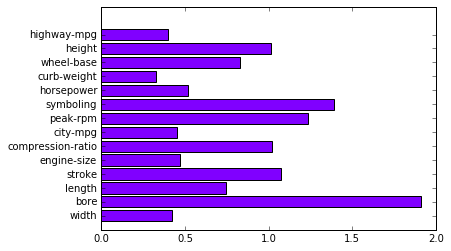

In [22]:
fig, ax = plt.subplots()

y_pos = np.arange(len(rmses))

ax.barh(y_pos, rmses.values(), align='center', color='#8000ff', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(rmses.keys())
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()

In [23]:
k_values = [1,3,5,7,9]
rmses_list = [{},{},{},{},{}]

for column in number_columns:
    for i, k_value in enumerate(k_values):
        rmses_list[i][column] = knn_train_test(columns=[column],
                                               target='price',
                                               df = cars_mean,
                                               k = k_value)

In [24]:
rmses_pd = pd.DataFrame(rmses_list)
rmses_pd['k_value'] = k_values
rmses_pd.set_index('k_value', inplace= True)
rmses_pd

,bore,city-mpg,compression-ratio,curb-weight,engine-size,height,highway-mpg,horsepower,length,peak-rpm,stroke,symboling,wheel-base,width
k_value,,,,,,,,,,,,,,
1,1.992746,0.531583,1.198595,0.499604,0.694975,1.344858,0.672528,0.627651,0.836146,1.386935,1.401209,1.288958,0.491498,0.908725
3,1.907480,0.516894,0.804992,0.364208,0.621522,1.205121,0.437633,0.542395,0.705113,1.218040,1.258016,0.861672,0.956873,0.541074
5,1.907911,0.451928,1.019286,0.326267,0.469482,1.015196,0.396967,0.521409,0.744332,1.238087,1.071497,1.389010,0.826542,0.424874
7,1.565716,0.431130,0.946135,0.346153,0.403433,0.838706,0.411199,0.468306,0.652796,1.100661,1.117792,1.210027,0.710169,0.433554
9,1.293267,0.415229,0.766192,0.341763,0.388400,0.730240,0.406666,0.434124,0.597681,1.026728,1.022486,1.000891,0.672053,0.398126


In [25]:
rmses_pd.sum(axis = 1)

k_value
1    13.876009
3    11.941032
5    11.802786
7    10.635778
9     9.493845
dtype: float64

In [26]:
rmses_pd.loc[5,:]

bore                 1.907911
city-mpg             0.451928
compression-ratio    1.019286
curb-weight          0.326267
engine-size          0.469482
height               1.015196
highway-mpg          0.396967
horsepower           0.521409
length               0.744332
peak-rpm             1.238087
stroke               1.071497
symboling            1.389010
wheel-base           0.826542
width                0.424874
Name: 5, dtype: float64

In [27]:
sorted_names = pd.DataFrame(rmses_pd.loc[5,:].sort_values()).reset_index().iloc[:,0].tolist()
sorted_names # return sorted list of features

['curb-weight',
 'highway-mpg',
 'width',
 'city-mpg',
 'engine-size',
 'horsepower',
 'length',
 'wheel-base',
 'height',
 'compression-ratio',
 'stroke',
 'peak-rpm',
 'symboling',
 'bore']

In [28]:
RMSE_dif_count_features = {}
for i in range(2,6):
    RMSE_dif_count_features[i] = knn_train_test(columns=sorted_names[0:i],target='price',
                                                df = cars_mean, k = 5)
    
RMSE_dif_count_features

{2: 0.40919218657135742,
 3: 0.39257832932580672,
 4: 0.28216339516052835,
 5: 0.25859567194019206}

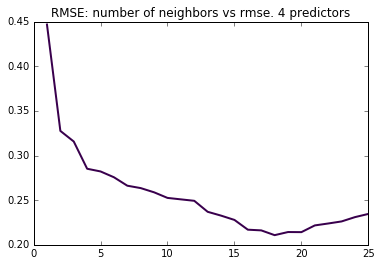

In [29]:
rmse_plot = {}
for i in range(1,26):
    rmse_plot[i] = knn_train_test(columns=sorted_names[0:4],target='price', df = cars_mean, k = i)
    
fig, ax = plt.subplots()
ax.plot(list(rmse_plot.keys()), list(rmse_plot.values()), c='#39004d', linewidth = 2)
ax.set_title('RMSE: number of neighbors vs rmse. 4 predictors')
plt.show()

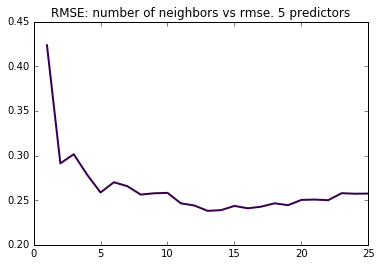

In [30]:
rmse_plot = {}
for i in range(1,26):
    rmse_plot[i] = knn_train_test(columns=sorted_names[0:5],target='price', df = cars_mean, k = i)
    
fig, ax = plt.subplots()
ax.plot(list(rmse_plot.keys()), list(rmse_plot.values()), c='#39004d', linewidth = 2)
ax.set_title('RMSE: number of neighbors vs rmse. 5 predictors')
plt.show()

### Modification (CV) for our k nearest neighbor function

In [46]:
def knn_train_test(columns, target, df, k = 5, n_folds = 2, seed = 1):
    np.random.seed(seed)
    knn = KNeighborsRegressor(n_neighbors= k)
    
    l = len(df)
    step = np.floor(l / n_folds)
    
    for i in range(1, n_folds + 1):
        if i == 1:
            df.loc[df.index[:step], 'fold'] = 1
        elif i == n_folds:
            df.loc[df.index[((i - 1)*step):], 'fold'] = n_folds
        else:
            df.loc[df.index[((i - 1)*step):(i*step)], 'fold'] = i
    
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    rmse = []
    
    for i in range(1, n_folds + 1):
        train = rand_df.loc[rand_df['fold'] != i, :]
        test  = rand_df.loc[rand_df['fold'] == i, :]
        
        fit = knn.fit(train[columns], train[target])
        prediction = fit.predict(test[columns])
        rmse.append(np.sqrt(mean_squared_error(test[target], prediction)))
    
    return np.mean(rmse)

In [47]:
knn_train_test(columns=sorted_names[0:5],target='price', df = cars_mean, k = 4, n_folds=10)

0.48162466090605449